# Overview of the BGC class composition and diversity

### Prepare the environment

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)
library(vegan)
source("src/create_barplot.R")
bgc_colors <- c('#8c510a','#bf812d','#dfc27d','#f6e8c3',
                '#c7eae5','#80cdc1','#35978f','#01665e',
                '#abdda4','#66c2a5', '#d53e4f','#f46d43',
                '#fdae61','#40004b','#762a83', '#9970ab')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: permute
Loading required package: lattice
This is vegan 2.6-4


---
# SOLA dataset
---

This [dataset](https://www.nature.com/articles/s41396-018-0158-1) consists of 40 metagenomic samples of surface seawater collected monthly from January 2012 to February 2015 at the SOLA station, located in the northwestern Mediterranean.

In this analysis we will use BGC class abundance composition previously computed utilizing [NAL's bioprospecting pipeline](https://github.com/new-atlantis-labs/bioprospecting).

Let's have a look:

In [3]:
! head data/sola/tables/2-bgc_abund.tsv

sample	bgc_class	abund
ERR2604071	betalactone	1.01401006711409
ERR2604071	phosphonate	1.04183496826313
ERR2604071	resorcinol	1.01119288561791
ERR2604071	terpene	4.11969119492286
ERR2604073	betalactone	3.18565274708853
ERR2604073	hserlactone	1.06897456071335
ERR2604073	phosphonate	1.05259071729958
ERR2604073	redox-cofactor	1.07977006857604
ERR2604073	terpene	7.43873731742168


And load the data and compute the relative abundances and Shannon diversity.

In [4]:
%%R

TBL <- read_tsv("data/sola/tables/2-bgc_abund.tsv", 
                col_names = T,
                show_col_types = F)

TBL_ext <- TBL %>%       
  group_by(sample) %>%
  mutate(abund_rel = 100*abund/sum(abund))

TBL_div <- TBL_ext %>%
  group_by(sample) %>%
  summarize(shannon = diversity(abund_rel))

Now we can create the plot. Given that this turns out to be a long and complex command, we created an R function for this task.

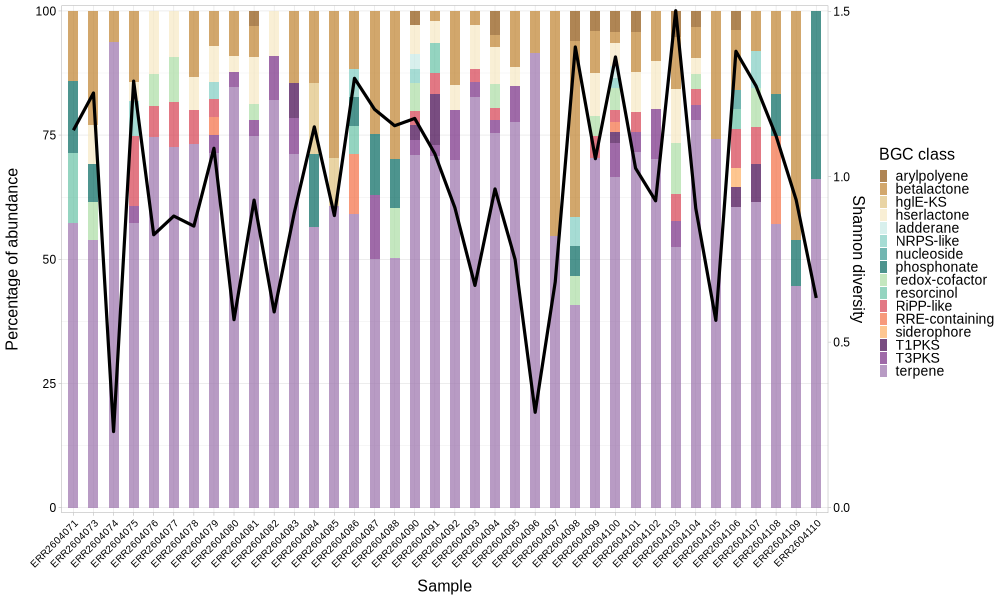

In [5]:
%%R -w 1000 -h 600
barplot <- create_barplot(TBL_ext, TBL_div, bgc_colors, text_size = 12)
barplot

Barplot representing the relative abundance of BGC classes per sample (left Y axis). The black curve represents the BGC class Shannon diversity (right Y axis). To compute the abundance of each BGC class within a sample, we summed the coverage of all the BGC sequences of the same class.